<a href="https://colab.research.google.com/github/Rkjha6634/EDA/blob/main/Banglore_HousePrice_Predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [178]:
data = pd.read_csv('/content/Bengaluru_House_Data.csv')
df = pd.DataFrame(data)

In [179]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [180]:
df.shape

(13320, 9)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [182]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [183]:
df['size'].mode()[0]

'2 BHK'

In [184]:
df.drop(['area_type','availability','society','balcony'],axis = 1 , inplace = True)

In [185]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [186]:
df['size'] = df['size'].fillna(df['size'].mode()[0])

In [187]:
df['bath'] = df['bath'].replace({'0': 'np.nan'})

In [188]:
df.isnull().sum()

location       1
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [189]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [190]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [191]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [192]:
df['size'].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [193]:
df['bhk'] = df['size'].str.split().str.get(0).astype(np.int64)

In [194]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [195]:
df['bhk'].value_counts()

2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [196]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [197]:
df['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [198]:
def convert(x):
  temp = x.split('-')
  if len(temp) == 2:
    return (float(temp[0]) + float(temp[1])) / 2
  try :
    return float(x)
  except:
    return None


In [199]:
df['total_sqft'] = df['total_sqft'].apply(convert)

In [177]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [200]:
df['total_sqft'].unique()


array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [201]:
df.drop('size',axis = 1 , inplace =True)

In [202]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

In [203]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [204]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [205]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [206]:
df['location'] = df['location'].apply(lambda x : x.strip())

In [207]:
location_count = df['location'].value_counts()

In [208]:
location_count

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [209]:
location_count_less_10 = location_count[location_count <= 10 ]

In [210]:
df['location'] = df['location'].apply(lambda x : 'others' if x in location_count_less_10 else x )

In [211]:
df['location'].value_counts()

others                2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [212]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [213]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [168]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [214]:
def Numerical_Plot(column):

        plt.figure(figsize=(20, 5))
        plt.subplot(1,2,1)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.boxplot(data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"\n{str(column)} Box Plot\n", fontsize = 15)

        plt.subplot(1, 2,2)
        plt.grid(color='black', linestyle='-', linewidth=0.25)
        sns.scatterplot(x=data[column],y=data["price"],hue=data[column])
        plt.xticks( horizontalalignment="center", fontsize=15)
        plt.xlabel(f"\n{str(column)}", fontsize=15)
        plt.yticks(fontsize = 15)
        plt.title(f"{str(column)} - Price\n", fontsize = 15)
        plt.ylabel("Price\n", fontsize=15)

        plt.show()
        print()

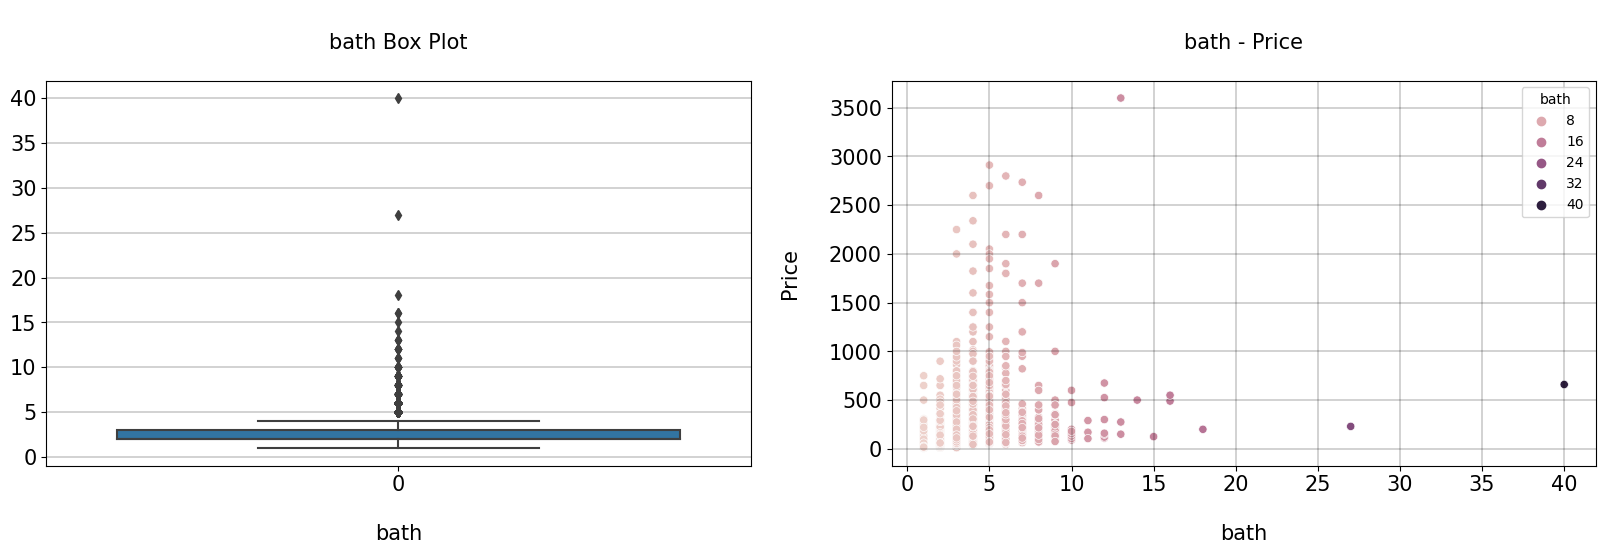

In [171]:
Numerical_Plot('bath')

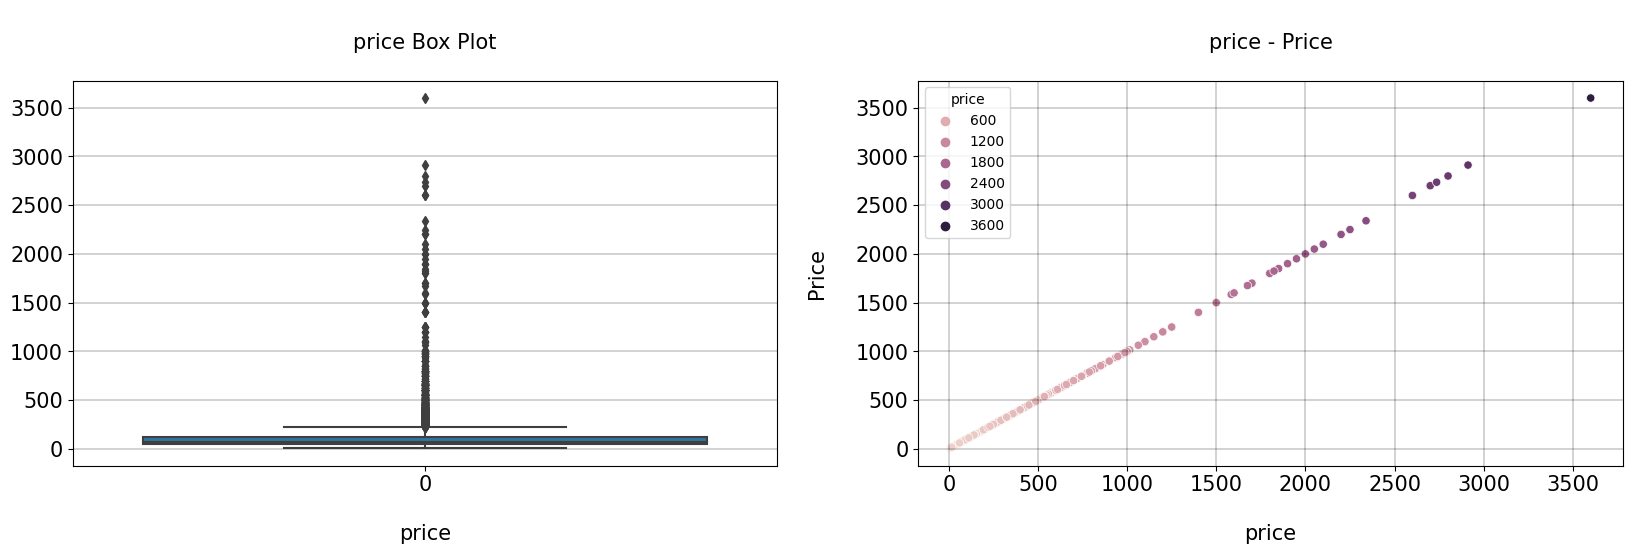

In [172]:
Numerical_Plot('price')

In [217]:
def remove_outliers_iqr_all_columns(data_frame, threshold=1.5):
    cleaned_df = data_frame.copy()
    for column_name in data_frame.columns:
        if np.issubdtype(data_frame[column_name].dtype, np.number):
            Q1 = data_frame[column_name].quantile(0.25)
            Q3 = data_frame[column_name].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            cleaned_df = cleaned_df[(cleaned_df[column_name] >= lower_bound) & (cleaned_df[column_name] <= upper_bound)]
    return cleaned_df


df_cleaned = remove_outliers_iqr_all_columns(df)

print("Original DataFrame:")
print(df)
print("\nDataFrame after Outlier Removal:")
print(df_cleaned)

Original DataFrame:
                       location  total_sqft  bath   price  bhk  price_per_sqft
0      Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1              Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2                   Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3            Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                      Kothanur      1200.0   2.0   51.00    2     4250.000000
...                         ...         ...   ...     ...  ...             ...
13315                Whitefield      3453.0   4.0  231.00    5     6689.834926
13316                    others      3600.0   5.0  400.00    4    11111.111111
13317     Raja Rajeshwari Nagar      1141.0   2.0   60.00    2     5258.545136
13318           Padmanabhanagar      4689.0   4.0  488.00    4    10407.336319
13319              Doddathoguru       550.0   1.0   17.00    1     3090.909091

[13320 rows x 6 columns]

DataF

<Axes: xlabel='total_sqft'>

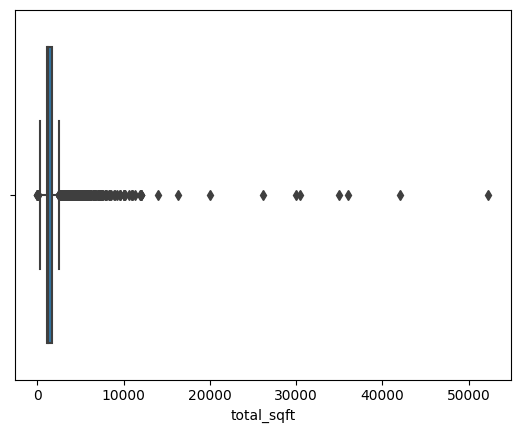

In [218]:
sns.boxplot(data = df , x = 'total_sqft')

<Axes: xlabel='total_sqft'>

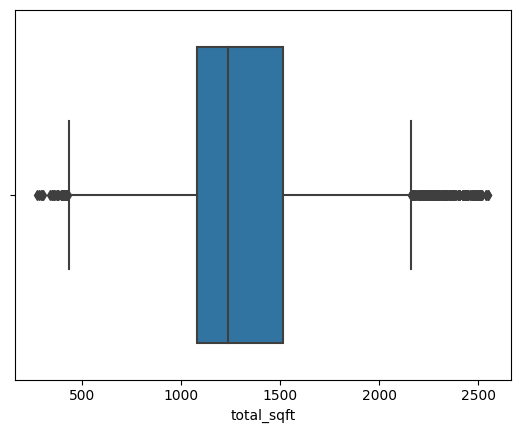

In [219]:
sns.boxplot(data = df_cleaned , x = 'total_sqft')

<Axes: xlabel='bhk'>

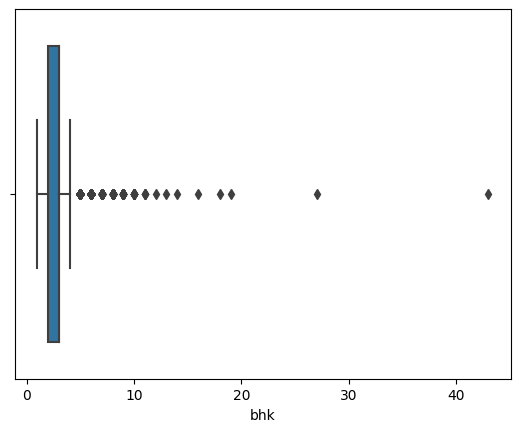

In [101]:
sns.boxplot(data = df , x = 'bhk')

<Axes: xlabel='bhk'>

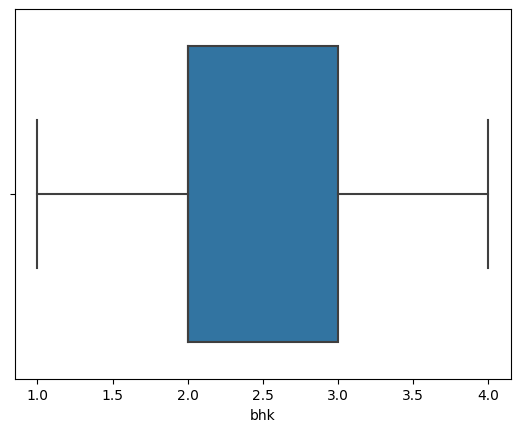

In [100]:
sns.boxplot(data = df_cleaned , x = 'bhk')

<Axes: xlabel='price_per_sqft'>

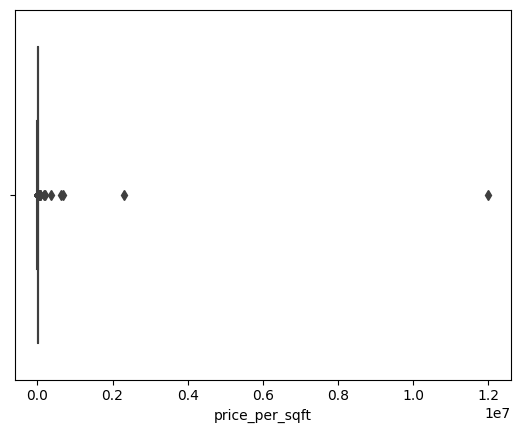

In [102]:
sns.boxplot(data = df , x = 'price_per_sqft')

<Axes: xlabel='price_per_sqft'>

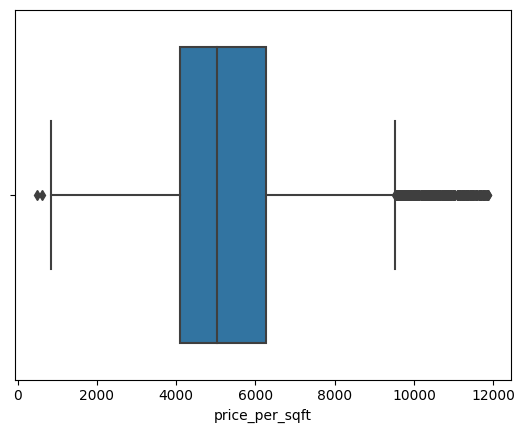

In [103]:
sns.boxplot(data = df_cleaned , x = 'price_per_sqft')

In [105]:
df_cleaned.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248


In [106]:
df1 = df_cleaned

In [107]:
df = df1.copy()

In [108]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10724 non-null  object 
 1   total_sqft      10724 non-null  float64
 2   bath            10724 non-null  float64
 3   price           10724 non-null  float64
 4   bhk             10724 non-null  int64  
 5   price_per_sqft  10724 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 586.5+ KB


In [116]:
df_encoded = pd.get_dummies(df, columns=['location'], prefix=['location'])

In [117]:
df = df_encoded

In [120]:
df.head()

,total_sqft,bath,price,bhk,price_per_sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_others
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2,3247.863248,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.preprocessing import OneHotEncoder , LabelEncoder, StandardScaler


In [121]:
X = df.drop('price',axis = 1 )
y = df['price']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [123]:
scaler = StandardScaler()

In [124]:
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

MAE 4.217739126743726
R2SCORE 0.9675427965157198


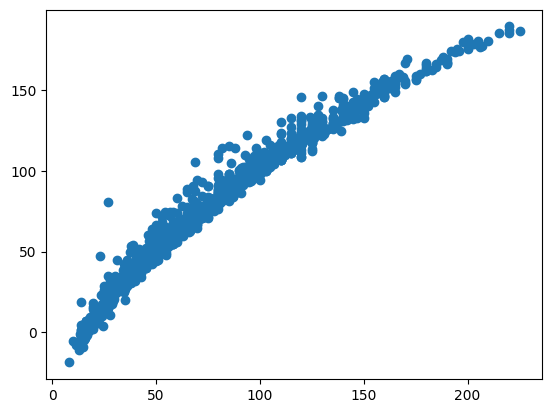

In [127]:
linReg = LinearRegression()
linReg.fit(X_train_scaled,y_train)
y_pred = linReg.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

MAE 4.194012919075988
R2SCORE 0.9625953289578785


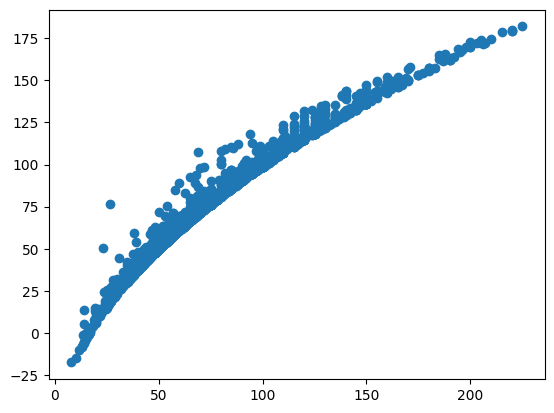

In [128]:
las = Lasso()
las.fit(X_train_scaled,y_train)
y_pred = las.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

MAE 4.216823342523702
R2SCORE 0.9675424000388246


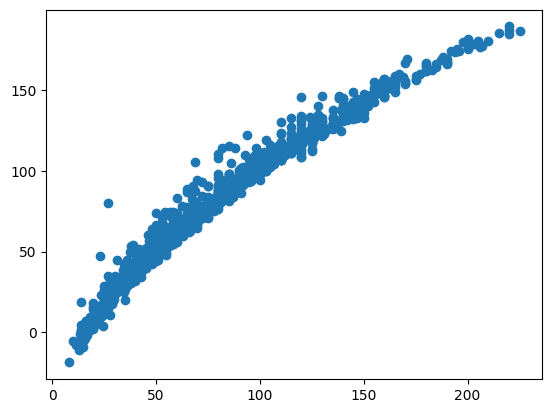

In [129]:
rid = Ridge()
rid.fit(X_train_scaled,y_train)
y_pred = rid.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

In [130]:
import statsmodels.api as sm

In [131]:
X = df.drop('price',axis = 1 )
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1197.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:49:18   Log-Likelihood:                -35519.
No. Observations:               10724   AIC:                         7.153e+04
Df Residuals:                   10480   BIC:                         7.330e+04
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
